# PREDICTING DELIVERY PROBLEM

IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

IMPORTING DATA

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Initial Analysis

In [3]:
df.shape

(21, 2)

In [4]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

ASSUMPTION CHECK

Check for linearity

In [7]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


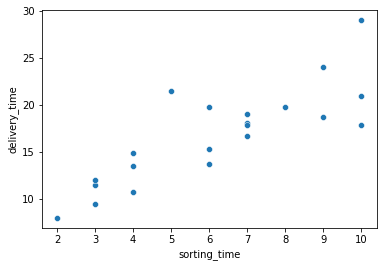

In [8]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df)
plt.show()

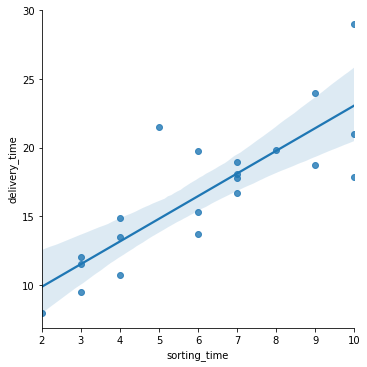

In [9]:
sns.lmplot(x='sorting_time',y='delivery_time',data=df)
plt.show()

linearity is satsfied

checking for corelation

In [10]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


colrelation satisieed

 Model Building | Model Training

In [9]:
import statsmodels.formula.api as smf

In [12]:
lin_reg_model=smf.ols(formula='delivery_time~sorting_time',data=df).fit()

Model testing

In [13]:
lin_reg_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

Findig rsquared values

In [14]:
lin_reg_model.rsquared,lin_reg_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Note:Here r2 and r2adj is 68% and 66% respectively so we are going for model improvement techniques

# Model Improvement Techniques

Here we are using log transformation techniques because r2score is 68% only

In [15]:
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
import numpy as np
df['log_delivery_time']=np.log(df['delivery_time'])
df['log_sorting_time']=np.log(df['sorting_time'])
df

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


In [19]:
log_transformed_df=df.loc[:,['log_delivery_time','log_sorting_time']]
log_transformed_df.head()

,log_delivery_time,log_sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


Model buliding

In [20]:
lin_reg_model_new=smf.ols(formula='log_delivery_time~log_sorting_time',data=log_transformed_df).fit()

Model testing

In [21]:
lin_reg_model_new.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [22]:
lin_reg_model_new.rsquared,lin_reg_model_new.rsquared_adj ##checkng r2score and r2adj score

(0.77216134926874, 0.7601698413355158)

Now model prediction 

first checking with manual calcuation

y=mx+c
if x=100 y=? here x=sorting time and y=delivery time

In [23]:
( 0.597522*100)+1.741987

61.494187000000004

if x=200 y=?

In [24]:
( 0.597522*200)+1.741987

121.246387

if x=300 y=?

In [25]:
( 0.597522*300)+1.741987

180.998587

Machine prediction

In [79]:
test_data=pd.read_csv('test_data_new.csv')
test_data

,log_sorting_time
0,100
1,200
2,300


In [27]:
lin_reg_model_new.predict(test_data)

0     61.494220
1    121.246453
2    180.998686
dtype: float64

# Applying squareroot transformation

In [66]:
squareroot_transfored_data=np.sqrt(df)
squareroot_transfored_data.head()

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278


Model building

In [74]:
lin_reg_model_newmodel=smf.ols(formula='delivery_time~sorting_time',data=squareroot_transfored_data).fit()

In [75]:
lin_reg_model_newmodel.params

Intercept       1.613479
sorting_time    1.002217
dtype: float64

In [76]:
lin_reg_model_newmodel.rsquared,lin_reg_model_newmodel.rsquared_adj #checkng r2score and r2adj score

(0.7292011987544664, 0.7149486302678594)

Now model prediction 

first checking with manual calcuation

y=mx+c
if x=100 y=? here x=sorting time and y=delivery time

In [72]:
(1.002217*100)+1.613479

101.835179

if x=200 y=?

In [77]:
(1.002217*200)+1.613479

202.056879

if x=300 y=?

In [78]:
(1.002217*300)+1.613479

302.278579

Now machine prediction

In [81]:
new_testdata=pd.read_csv('test.csv')
new_testdata

,sorting_time
0,100
1,200
2,300


In [82]:
lin_reg_model_newmodel.predict(new_testdata)

0    101.835167
1    202.056855
2    302.278543
dtype: float64

# SALARY HIKE PROBLEM 

In [11]:
df1=pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Initial Analysis

In [12]:
df1.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df1.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [14]:
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
df1.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


ASSUMPTION CHECK

Check for linearity

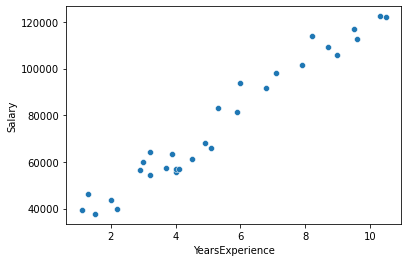

In [17]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df1)
plt.show()

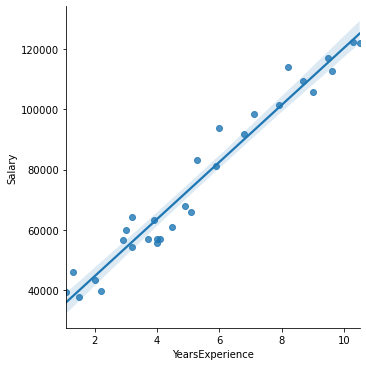

In [18]:
sns.lmplot(x='YearsExperience',y='Salary',data=df1)
plt.show()

corelation checking

In [19]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Model Building | Model Training

In [20]:
import statsmodels.formula.api as smf

In [21]:
model=smf.ols(formula='Salary~YearsExperience',data=df1).fit()

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Findng rsquared values

In [23]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model prediction

In [ ]:
# cheking with manual calcuation
y=mx+c
if x=5 #x=years of experiance and y =salay hike


In [55]:
(9449.962321*5)+25792.200199

73042.01180400001

if x=6 y=?

In [94]:
(9449.962321*6)+25792.200199

82491.97412500001

if x=7 y=?

In [95]:
(9449.962321*7)+25792.200199

91941.936446

Machine prediction

In [103]:
test_data2=pd.read_csv('test_data2.csv')
test_data2

,YearsExperience
0,5
1,6
2,7


In [104]:
model.predict(test_data2)

0    73042.011806
1    82491.974127
2    91941.936449
dtype: float64

Note:Here r2 score and r2adjacent is 95% 

# Applying log transformation

In [24]:
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
df1['log_YearsExperience']=np.log(df1['YearsExperience'])
df1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [31]:
df2=df1.loc[:,['log_YearsExperience','Salary']]
df2.head()

,log_YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0


Model buliding

In [33]:
new_model=smf.ols(formula='Salary~log_YearsExperience',data=df2).fit()

In [34]:
new_model.params

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64

In [35]:
new_model.rsquared,new_model.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

Note:Here after performing log transformation r2 score and r2 adj percentage is less comparing to above model so am not going to test this model 

# Applying squareroot transformation

In [37]:
df1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [42]:
df3=df1.loc[:,['YearsExperience','Salary']]
df3.head()# original given data is df3


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Now applyng squareroot transformation

In [45]:
df4=np.sqrt(df3)
df4.head()

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314


Now model building

In [47]:
squareroot_model=smf.ols(formula='Salary~YearsExperience',data=df4).fit()

In [48]:
squareroot_model.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [49]:
squareroot_model.rsquared,squareroot_model.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

Note:Here after performing squareroot transformation r2 score and r2 adj is less compare 1st model so no need to test this squareroot_model

conclusion:From the all above models only 1st model is the best model as r2 and r2adj is good percentage and after applying log and squareroot the mentioned score were less.so,we can select 1st model only and i have shown with test data also for that model.